# PHREEQC Model Plotting
This notebook will plot your PHREEQC modeling result. You will need to the selected output file from PHREEQC. 


### Start this notebook by uploading your selected output file from PHREEQC.
* Replace `selected_example.sel` with the filename of your selected output from PHREEQC

In [31]:
selectedoutput = "HA_test.sel"

In [32]:
# import the pandas module to store data in a dataframe
import pandas as pd
import os

# load the selected output into a dataframe and specify that the data are separated by tabs
mod = pd.read_csv(selectedoutput, sep="\t")
# get rid of the first row data (they are not needed for this analysis)
mod.drop([0], inplace=True)
mod.drop([1], inplace=True)
# drop the last column (it is not empty)
mod.drop(mod.columns[-1], axis=1, inplace=True)
# get rid of extraneous whitespaces in the column headers
mod = mod.rename(columns=lambda x: x.strip())
# sort the data in acending order based on pH
mod.sort_values("pH", inplace=True)

# Double check that the selected output looks correct

In [33]:
mod

,pH,m_BactaOCd+,m_BactbOCd+,m_BactcOCd+,m_BactdOCd+,m_SnomaCd+,m_SnombCd+,m_SnomcCd+,m_SnomdCd+
3,3.03436,1.248500e-09,3.572600e-11,1.612600e-11,1.120000e-12,8.314400e-12,3.469400e-12,4.384800e-13,1.571900e-14
4,3.03436,1.248500e-09,3.572600e-11,1.612600e-11,1.120000e-12,8.314400e-12,3.469400e-12,4.384800e-13,1.571900e-14
5,3.03436,1.248500e-09,3.572600e-11,1.612600e-11,1.120000e-12,8.314400e-12,3.469400e-12,4.384800e-13,1.571900e-14
6,3.50000,1.948400e-09,1.000000e-10,4.694600e-11,3.262600e-12,1.285900e-11,9.698400e-12,1.276600e-12,4.579100e-14
7,4.00000,2.431800e-09,2.794400e-10,1.477500e-10,1.028700e-11,1.595000e-11,2.699400e-11,4.017300e-12,1.443800e-13
8,4.50000,2.632900e-09,6.476100e-10,4.628800e-10,3.241400e-11,1.722300e-11,6.205700e-11,1.258300e-11,4.549800e-13
9,5.00000,2.690900e-09,1.108500e-09,1.428900e-09,1.018900e-10,1.758500e-11,1.051500e-10,3.881100e-11,1.430200e-12
10,5.50000,2.681400e-09,1.418500e-09,4.222900e-09,3.181300e-10,1.751800e-11,1.336000e-10,1.144000e-10,4.465800e-12
11,6.00000,2.612600e-09,1.520400e-09,1.109000e-08,9.767100e-10,1.706700e-11,1.427500e-10,2.984700e-10,1.371200e-11
12,6.50000,2.478100e-09,1.489500e-09,2.277600e-08,2.920300e-09,1.618800e-11,1.396900e-10,6.057800e-10,4.100100e-11


### We need to sum Cd adsorbed onto each surface site at each pH value in order to calculate total Cd adsorbed onto the bacteria and complexed by the humic / fulvic acids.

In [34]:
# Total Cd used in the modeling in molality
Cdm = 2.41e-7
# sum the Cd adsorbed on the strong and weak surface sites at each pH value
modcdads = mod["m_BactaOCd+"] + mod["m_BactbOCd+"] + mod["m_BactcOCd+"] + mod["m_BactdOCd+"]
HAads = mod["m_SnomaCd+"] + mod["m_SnombCd+"] + mod["m_SnomcCd+"] + mod["m_SnomdCd+"]
# calculate total Cd adsorbed as a percent
modsper = (modcdads / Cdm) * 100
# calculate total Cd complexed with HA as a percent
HAper = (HAads / Cdm) * 100
# calculate Cd complexed with HA as a percent
HAsitea = mod["m_SnomaCd+"] / Cdm * 100
HAsiteb = mod["m_SnombCd+"] / Cdm * 100
HAsitec = mod["m_SnomcCd+"] / Cdm * 100
HAsited = mod["m_SnomdCd+"] / Cdm * 100
# calcuate Cd adsorbed on the strong and weak site as percents
sitea = mod["m_BactaOCd+"] / Cdm * 100
siteb = mod["m_BactbOCd+"] / Cdm * 100
sitec = mod["m_BactcOCd+"] / Cdm * 100
sited = mod["m_BactdOCd+"] / Cdm * 100

### Bacteria model result plots

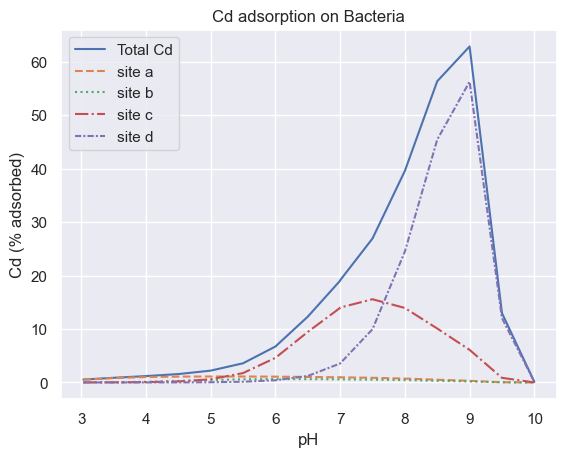

In [35]:
# Import a modules for the plotting 
import matplotlib.pyplot as plt

# The seaborn module will make the plots look nicer
import seaborn as sns

sns.set_theme()

plt.figure()
# Plot the cumulative model and individual site adsorption
plt.plot(mod["pH"], modsper, label="Total Cd", linestyle="-")
plt.plot(mod["pH"], sitea, label="site a", linestyle="--")
plt.plot(mod["pH"], siteb, label="site b", linestyle=":")
plt.plot(mod["pH"], sitec, label="site c", linestyle="-.")
plt.plot(mod["pH"], sited, label="site d", linestyle=(0, (3, 1, 1, 1)))
# Label the x and y axes
plt.xlabel("pH")
plt.ylabel("Cd (% adsorbed)")
plt.title("Cd adsorption on Bacteria")
# Add a legend to the plot
plt.legend()

# Save and download the plot as png file
# plt.savefig("bact_high.png")

### Plot Cd complexation by humic/ fulvic acids 

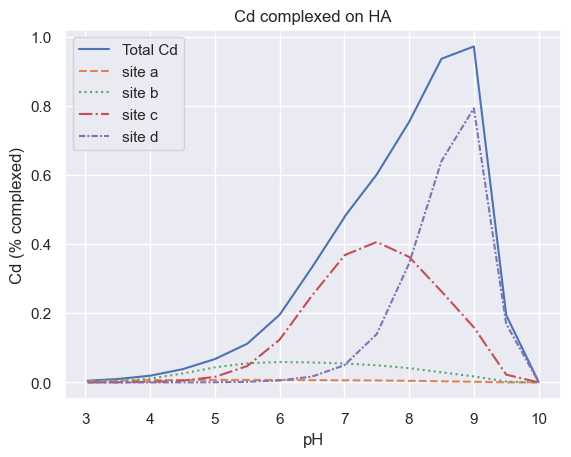

In [36]:
# Create a new figure
plt.figure()
# Plot the cumulative model and individual site adsorption
plt.plot(mod["pH"], HAper, label="Total Cd", linestyle="-")
plt.plot(mod["pH"], HAsitea, label="site a", linestyle="--")
plt.plot(mod["pH"], HAsiteb, label="site b", linestyle=":")
plt.plot(mod["pH"], HAsitec, label="site c", linestyle="-.")
plt.plot(mod["pH"], HAsited, label="site d", linestyle=(0, (3, 1, 1, 1)))
# Label the x and y axes
plt.xlabel("pH")
plt.ylabel("Cd (% complexed)")
plt.title("Cd complexed on HA")
# Add a legend to the plot
plt.legend()

# Save and download the plot as png file
# plt.savefig("HA_low.png")

### Plot of Cd partitioned between bacteria and humic / fulvic acids

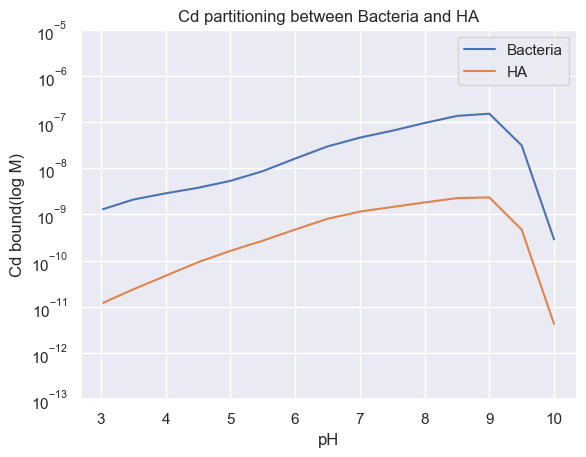

In [37]:
# Create a new figure
plt.figure()
# I'll plot the data as points and the model as a line
plt.plot(mod["pH"], modcdads, label="Bacteria")
plt.plot(mod["pH"], HAads, label="HA")
# Label the x and y axes
plt.xlabel("pH")
plt.ylabel("Cd bound(log M)")
plt.title("Cd partitioning between Bacteria and HA")
# Y axis in log scale
plt.yscale("log")
# y axis limits
plt.ylim(1e-13, 1e-5)
# Add a legend to the plot
plt.legend()
# plt.savefig("Bact_end.png")